# Сборный проект
**Идентификация причин убыточности Procrastinate Pro+, формулировка рекомендаций**

**Описание проекта:**

*Потенциальный заказчик:* развлекательное приложение Procrastinate Pro+


*Цель:* **разобраться в причинах убыточности и помочь компании выйти в плюс.**. Сформулировать рекомендации для маркетингового отдела.


В распоряжении исследователя три датасета: лог сервера с информацией о посещениях сайта (visits_info_short.csv), с информацией о заказах (orders_info_short.csv) и с информацией о расходах на рекламу(costs_info_short.csv).

**Структура visits_info_short.csv:**
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

**Структура orders_info_short.csv:**
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

**Структура costs_info_short.csv:**
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

**Последовательность шагов:**    
1). Загрузка данных и подготовка их к анализу;      
2). Описание функций для расчёта и анализа LTV, ROI, удержания и конверсии;    
3). Исследовательский анализ данных;    
4). Маркетинг;     
5). Оценка окупаемости рекламы;     
6). Выводы


### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
#загрузка библиотек
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#выгрузка датасетов
visits = pd.read_csv('/datasets/visits_info_short.csv')  # визиты
display(visits)
orders = pd.read_csv('/datasets/orders_info_short.csv')# заказы
display(orders)
costs = pd.read_csv('/datasets/costs_info_short.csv')# расходы
display(costs)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


**Предобработка данных датасета visits**

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


- Названия переменных необходимо привести к нижнему регистру (для удобства при дальнейшем исследовании)    
- В датасете формат столбцов Session Start и Session End необходимо преобразовать из строкового в формат datetime

In [4]:
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end'] 
#print(visits) #проверка того, что столбцы переименованы

In [5]:
#преобразование типов данных
visits['session_start']= pd.to_datetime(visits['session_start'])
visits['session_end']= pd.to_datetime(visits['session_end'])
#visits.info() #проверка того, что тип данных поменялся

In [6]:
#вывод количества пропусков для каждого столбца
print(visits.isna().sum()) #пропусков нет

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64


In [7]:
print(visits.duplicated().sum()) #поиск дубликатов
#дубликаты не найдены 

0


In [8]:
#идентификация уникальных значений в столбцах
visits['region'].value_counts()
visits['device'].value_counts()
visits['channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

**Предобработка данных датасета orders**    
Последовательность действий аналогична

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [10]:
orders.columns = ['user_id', 'event_dt', 'revenue'] 
#print(orders) #проверка того, что столбцы переименованы

In [11]:
orders['event_dt']= pd.to_datetime(orders['event_dt'])
#orders.info() #проверка того, что тип данных поменялся

In [12]:
#вывод количества пропусков для каждого столбца
print(orders.isna().sum()) #пропусков нет

user_id     0
event_dt    0
revenue     0
dtype: int64


In [13]:
print(orders.duplicated().sum()) #поиск дубликатов
#дубликаты не найдены 

0


**Предобработка данных датасета costs**    

In [14]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [15]:
costs.columns = ['dt', 'channel', 'costs'] 
#print(costs) #проверка того, что столбцы переименованы

In [16]:
costs['dt']= pd.to_datetime(costs['dt']).dt.date
costs.info() #проверка того, что тип данных поменялся

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [17]:
#вывод количества пропусков для каждого столбца
print(costs.isna().sum()) #пропусков нет

dt         0
channel    0
costs      0
dtype: int64


In [18]:
print(orders.duplicated().sum()) #поиск дубликатов
#дубликаты не найдены 

0


Таким образом, были изучены файлы с данными и выполнена базовая предобработка:    
-названия столбцом приведены к "змеиному" регистру     
-столбцы с датой и временем приведены к соответствующему типу    
Также была осуществлена проверка на предмет наличия пропусков и дубликатов

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [19]:
# функция для создания пользовательских профилей

def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [20]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [21]:
# функция для расчёта конверсии

def get_conversion(
    visits,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_orders = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_orders[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [22]:
# функция для расчёта LTV и ROI

def get_ltv(
    visits,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [23]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [24]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [25]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [26]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [27]:
# идентификация профилей пользователей
profiles = get_profiles(visits, orders, costs)
display(profiles.head(10))

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


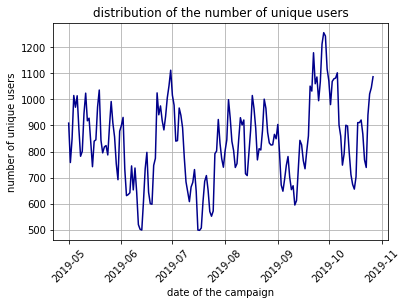

In [28]:
#построение графика
profiles.pivot_table(index = 'dt', values = 'user_id', aggfunc ='nunique').plot(grid = True, color = 'darkblue', legend= False)
plt.title('distribution of the number of unique users')
plt.xlabel('date of the campaign')
plt.xticks(rotation=45)
plt.ylabel('number of unique users')
plt.show()

In [29]:
#Определение минимальной и максимальной даты привлечения пользователей
print('Минимальная дата привлечения пользователей:', profiles['dt'].min())
print('Максимальная дата привлечения пользователей:',profiles['dt'].max())

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


Согласно ТЗ, в распоряжении исследователя есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года. В рассматриваемом наборе данных действительно минимальная дата привлечения пользователей - 2019-05-01, а максимальная - 2019-10-27.

In [30]:
countries = profiles.groupby('region').agg({'user_id': 'count'}).rename(columns={'user_id': 'total_count'}).reset_index()

#for region in countries['region']:
#    countries['share'] = len(profiles.query('payer == True and region == @region')) / (len(profiles.query('region == @region'))) #не работает

countries['share'] = [len(profiles.query('payer == True and region == "France"')) / (len(profiles.query('region == "France"')))*100,
                      len(profiles.query('payer == True and region == "Germany"')) / (len(profiles.query('region == "Germany"')))*100,
                      len(profiles.query('payer == True and region == "UK"')) / (len(profiles.query('region == "UK"')))*100,
                      len(profiles.query('payer == True and region == "United States"')) / (len(profiles.query('region == "United States"')))*100]


print(countries)

          region  total_count     share
0         France        17450  3.799427
1        Germany        14981  4.111875
2             UK        17575  3.982930
3  United States       100002  6.901862


Наибольшее количество пользователей приходится на США, при этом доля платящих пользователей для данной страны также самая высокая

In [32]:
devices = profiles.groupby('device').agg({'user_id': 'count', 'payer':'sum'}).rename(columns={'user_id': 'total_count'}).reset_index()
devices['share'] = devices['payer']/devices['total_count']*100
print(devices)

    device  total_count  payer     share
0  Android        35032   2050  5.851793
1      Mac        30042   1912  6.364423
2       PC        30455   1537  5.046790
3   iPhone        54479   3382  6.207897


Большая часть клиентов использует iPhone, но при этом наибольшая доля платящих пользователей предпочитают Mac

Более того, большая часть пользователей (в том числе платящих)используют технику Apple

In [34]:
channels = profiles.groupby('channel').agg({'user_id': 'count', 'payer':'sum'}).rename(columns={'user_id': 'total_count'}).reset_index()
channels['share']=channels['payer']/channels['total_count']*100

print(channels)

               channel  total_count  payer      share
0           AdNonSense         3880    440  11.340206
1             FaceBoom        29144   3557  12.204914
2              LeapBob         8553    262   3.063253
3         MediaTornado         4364    156   3.574702
4   OppleCreativeMedia         8605    233   2.707728
5       RocketSuperAds         4448    352   7.913669
6               TipTop        19561   1878   9.600736
7       WahooNetBanner         8553    453   5.296387
8              YRabbit         4312    165   3.826531
9       lambdaMediaAds         2149    225  10.469986
10             organic        56439   1160   2.055316


В тройке наиболее "действующих" каналов привлечения - FaceBoom, AdNonSense и lambdaMediaAds. Наиболее отстающие каналы по доле платящих пользователей - OppleCreativeMedia, LeapBob и MediaTornado

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [35]:
print('Общая сумма расходов на маркетинг равна', round(costs['costs'].sum()))

Общая сумма расходов на маркетинг равна 105497


In [37]:
#распределение трат по рекламным источникам
costs_by_channels = costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by = 'costs',ascending=False).reset_index()
costs_by_channels['share'] = round(costs_by_channels['costs']/round(costs['costs'].sum())*100,2)
print(costs_by_channels)

              channel     costs  share
0              TipTop  54751.30  51.90
1            FaceBoom  32445.60  30.75
2      WahooNetBanner   5151.00   4.88
3          AdNonSense   3911.25   3.71
4  OppleCreativeMedia   2151.25   2.04
5      RocketSuperAds   1833.00   1.74
6             LeapBob   1797.60   1.70
7      lambdaMediaAds   1557.60   1.48
8        MediaTornado    954.48   0.90
9             YRabbit    944.22   0.90


Text(0, 0.5, 'costs')

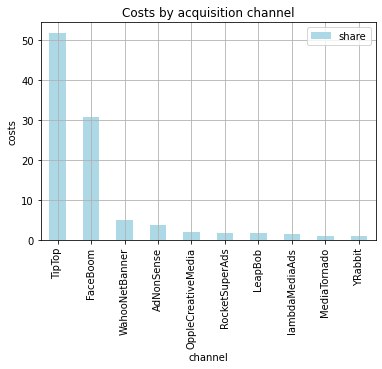

In [72]:
costs_by_channels.plot(kind = 'bar', x = 'channel',y = 'share', color = 'lightblue', grid = True)
plt.title('Сosts by acquisition channel')
plt.ylabel('costs')

Наибольшая доля расходов на маркетинг сконцентрирована на канале TipTop. При этом FaceBoom, на который приходится большая часть пользователей (и большая часть платящих пользователей), не является самым "затратным" каналом

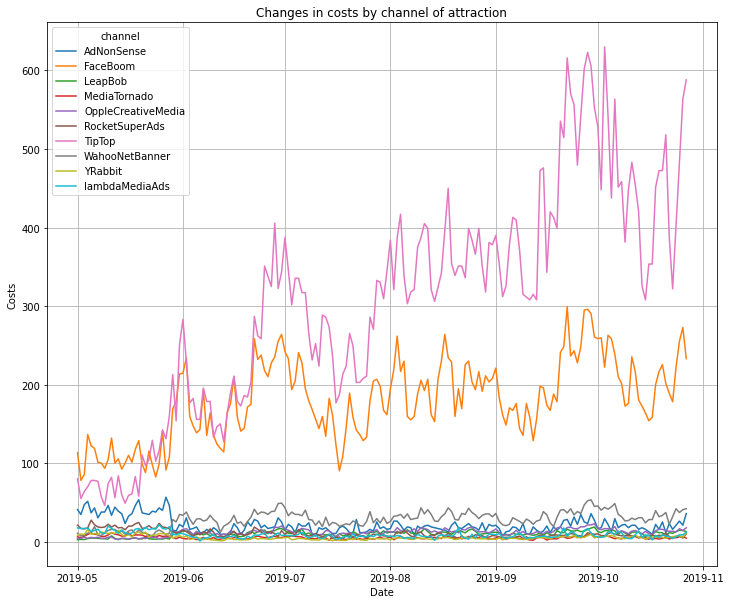

In [39]:
costs.pivot_table(index='dt', columns='channel', values='costs', aggfunc='sum').plot(figsize=(12, 10),grid=True)
plt.title('Сhanges in costs by channel of attraction')
plt.xlabel('Date')
plt.ylabel('Costs')
plt.show()

TipTop и FaceBoom - единственные каналы привлечения, у которых с течением времени можно наблюдать рост затрат.

**Альтернативное представление динамики - изменения по месяцам и неделям**

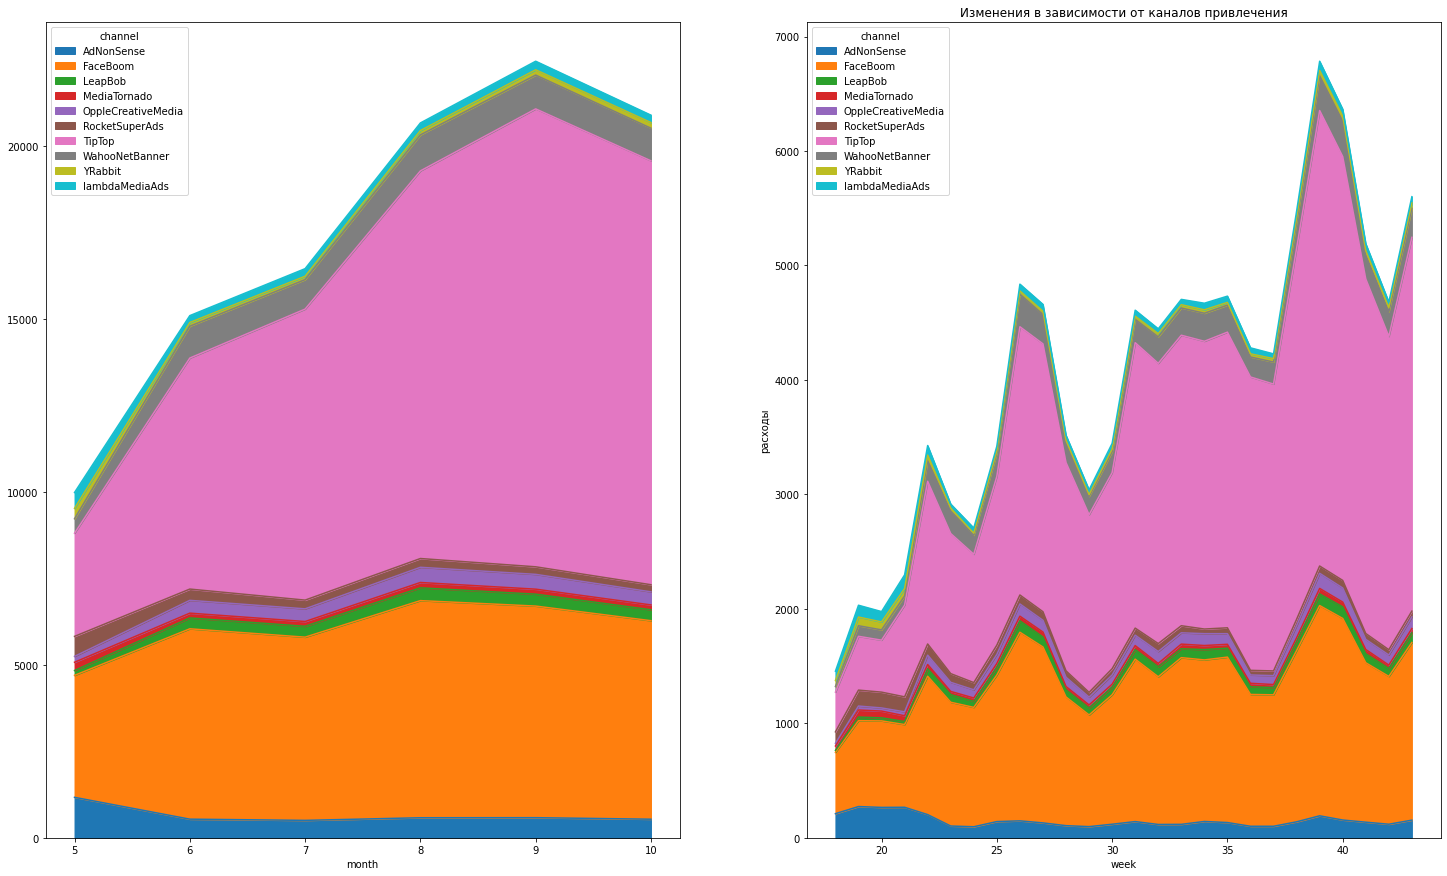

In [40]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.month
costs['week']=costs['dt'].dt.isocalendar().week

plt.figure(figsize = (25,15))

for i, part in enumerate([costs['month'],costs['week']]):
    costs_pivot=costs.pivot_table(index = part,columns = 'channel', values = 'costs', aggfunc = 'sum').plot.area(ax= plt.subplot(1,2,i+1))

plt.title('Изменения в зависимости от каналов привлечения')
plt.ylabel('расходы')
plt.show()


Изучая динамику изменения расходов во времени (отдельно по месяцам и неделям) по каждому источнику, можно также отметить, что особенно выделяются каналы TipTop и FaceBoom

**САС**

Теоретическая интерпретация:     
**CAC**, или **Customer Acquisition Cost**, — стоимость привлечения одного клиента. Сумма денег, в которую компании обходится каждый новый клиент (CAC — это инвестиции в маркетинг).

In [41]:
cac = profiles.query('channel != "organic"').pivot_table(index = 'channel', values = 'acquisition_cost', aggfunc = 'mean').sort_values(by = 'acquisition_cost', ascending=False)
print(cac)

                    acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172


Text(0, 0.5, 'average cost per client')

<Figure size 1800x576 with 0 Axes>

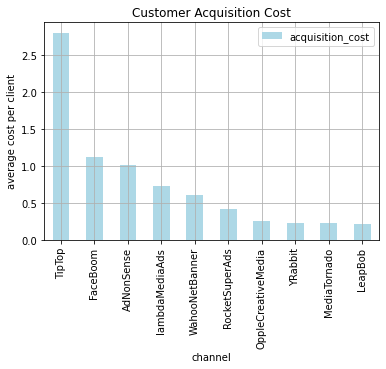

In [42]:
plt.figure(figsize = (25,8))
cac.plot(kind = 'bar', color = 'lightblue', grid = True)
plt.title('Customer Acquisition Cost')
plt.ylabel('average cost per client')

Стоимость привлечения одного клиента для разных источников различается. Наибольшая - у канала TipTop, наименьшая - у LeapBob.
Возможно, при продумывании дальнейшей стратегии стоит обратить внимание на каналы привлечения, у которых стоимость привлечения небольшая.

**ПРОМЕЖУТОЧНЫЙ ВЫВОД**

Общая сумма расходов на маркетинг для компании Procrastinate Pro+ равна **105 497** у.е.

Наибольшая доля расходов на маркетинг сконцентрирована на канале TipTop. Также достаточно затратным каналом является **FaceBoom** (на втором месте). На **FaceBoom** приходится большая часть пользователей (и большая часть платящих пользователей).
Наименьшая доля затрат на маркетинг сконцентрирована на каналах **lambdaMediaAds**, **MediaTornado** и **YRabbit**.

Более того, **TipTop** и **FaceBoom** - единственные каналы привлечения, у которых с течением времени можно наблюдать рост затрат. Изучая динамику изменения расходов во времени (отдельно по месяцам и неделям) по каждому источнику, можно также отметить, что описанные выше каналы особенно выделяются.

Стоимость привлечения одного клиента для разных источников различается. Наибольшая - у канала **TipTop**, наименьшая - у **LeapBob**. Возможно, при продумывании дальнейшей стратегии стоит обратить внимание на каналы привлечения, у которых стоимость привлечения небольшая.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### **Анализ окупаемости рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI**

In [56]:
profiles = profiles.query('channel != "organic"')

In [73]:
visits = visits.query('channel != "organic"')

In [76]:
#cчитаем, что на календаре 1 ноября 2019 года - можем задать момент анализа
observation_date = datetime(2019, 11, 1).date()  # момент анализа
#в бизнес-плане заложено, что пользователи должны окупаться 
#не позднее чем через две недели после привлечения - можем задать горизонт анализа
horizon_days = 14  # горизонт анализа 

In [77]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    visits, orders, observation_date, horizon_days)

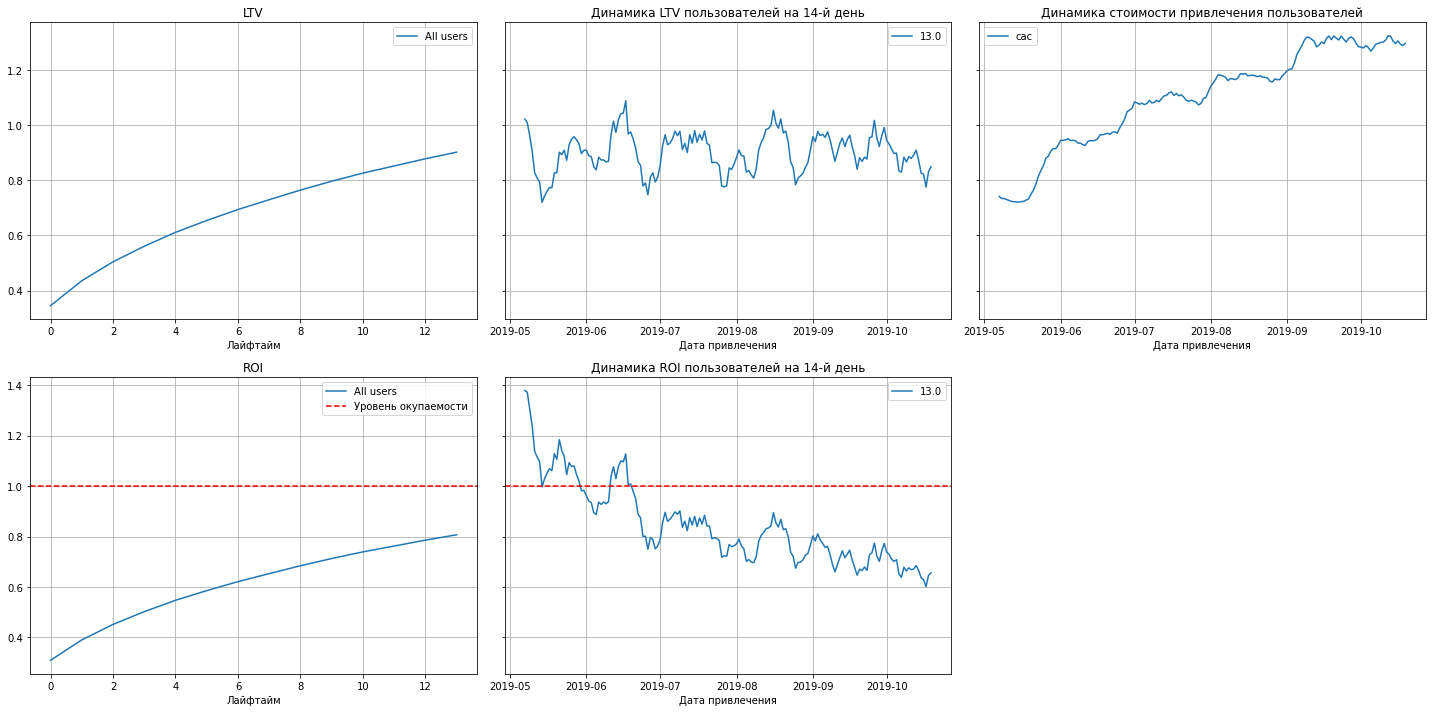

In [78]:
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

- Динамика стоимости привлечения пользователей имеет положительный тренд
- Динамика «пожизненной ценности» клиента изменилась не столь существенно по сравнению с началом периода (даже немного снизилась). Имеет место сезонный фактор.
- Реклама не окупается. Даже в конце периода ROI не достигает уровня окупаемости
- Начиная с середины июня клиенты не окупались 

#### **Провека конверсии и удержания**

##### Конверсия пользователей и динамика её изменения

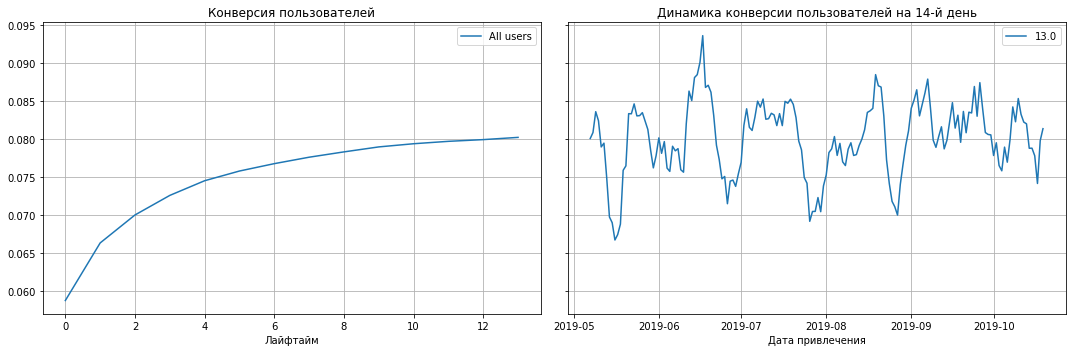

In [79]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    visits, orders, observation_date, horizon_days, dimensions=[]
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия пользователей имеет вид параболы, симметричной оси ОХ. Что касается динамики, может иметь место сезонность

##### Конверсия в разбивке по странам

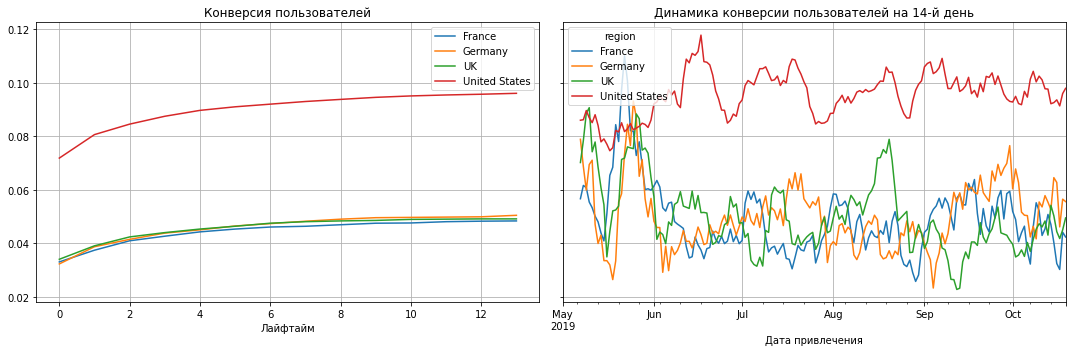

In [80]:
# конверсия в разбивке по странам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    visits, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

- Наибольшая конверсия у пользователей из США
- У остальных стран конверсия примерно на одном уровне

##### Конверсия в разбивке по устройствам

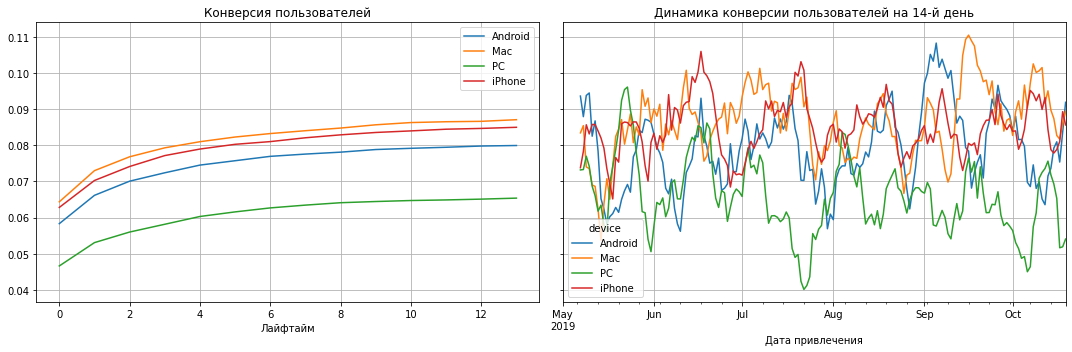

In [81]:
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    visits, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Хуже всего конвертируются пользователи РС

##### **Удержание пользователей и динамика его изменения**

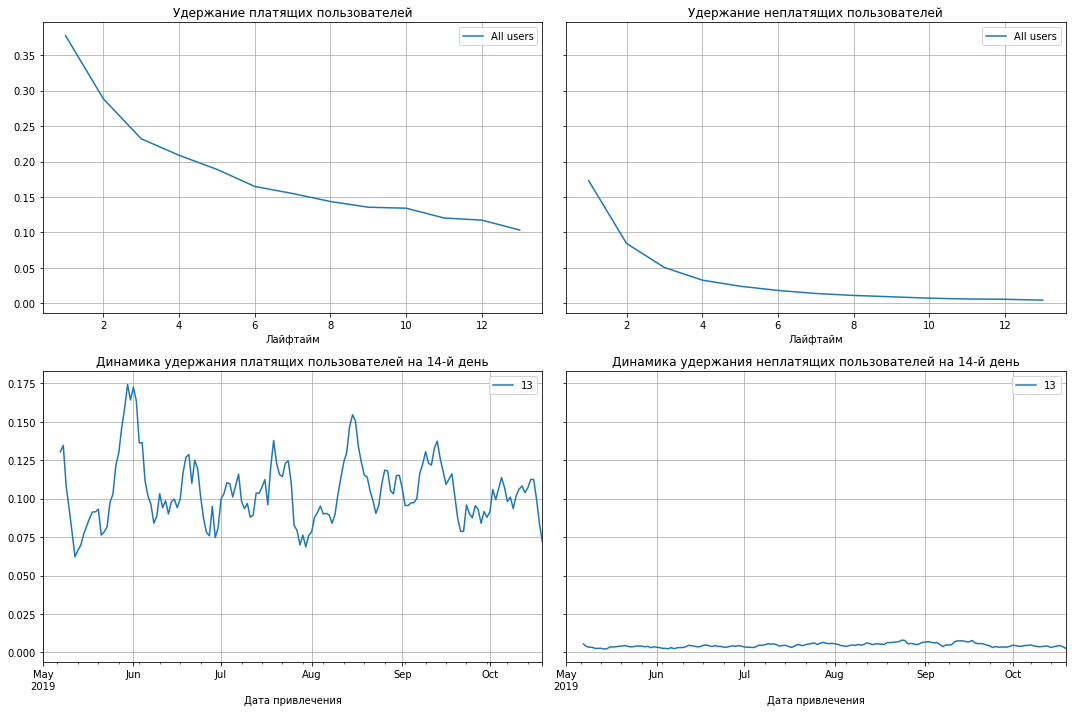

In [82]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=[]
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание пользователей (как платящих, так и неплатящих) имеет отрицательный тренд

##### Удержание в разбивке по странам

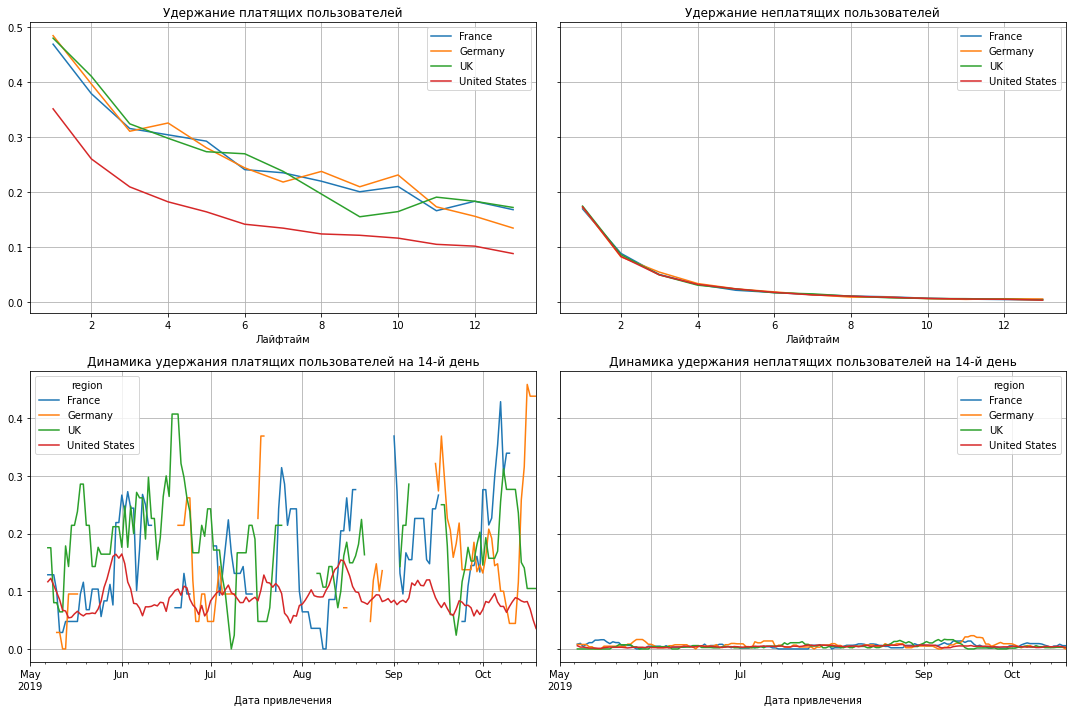

In [83]:
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

- Несмотря на высокую конверсию, США имеет худший показатель удержания платящих пользователей среди всех рассматриваемых стран    
- Удержание неплатящих пользователей для всех стран приблизительно на одном уровне.

##### Удержание в разбивке по устройствам

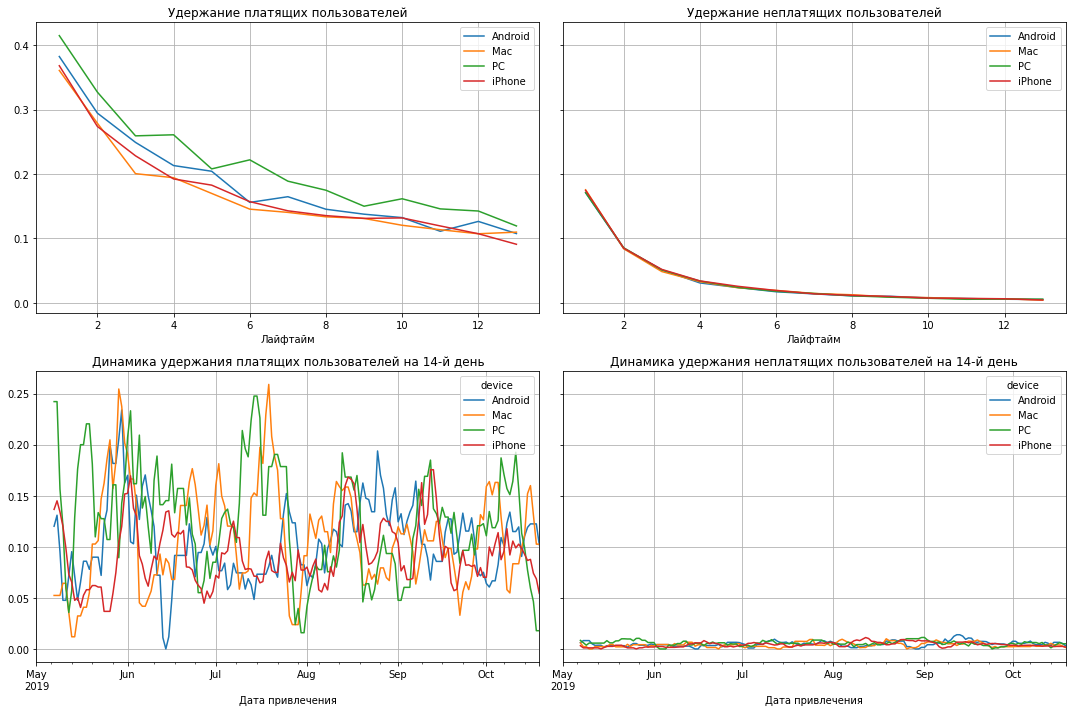

In [85]:
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

- Удердание платящих пользователей на конец периода наименьшее среди пользователей iphone
- Среди неплатящих польщователей в разбивке по устройствам динамика схожа

#### Анализ окупаемости рекламы

##### **Анализ окупаемости рекламы с разбивкой по устройствам**    
Графики LTV и ROI, а также графики динамики LTV, CAC и ROI

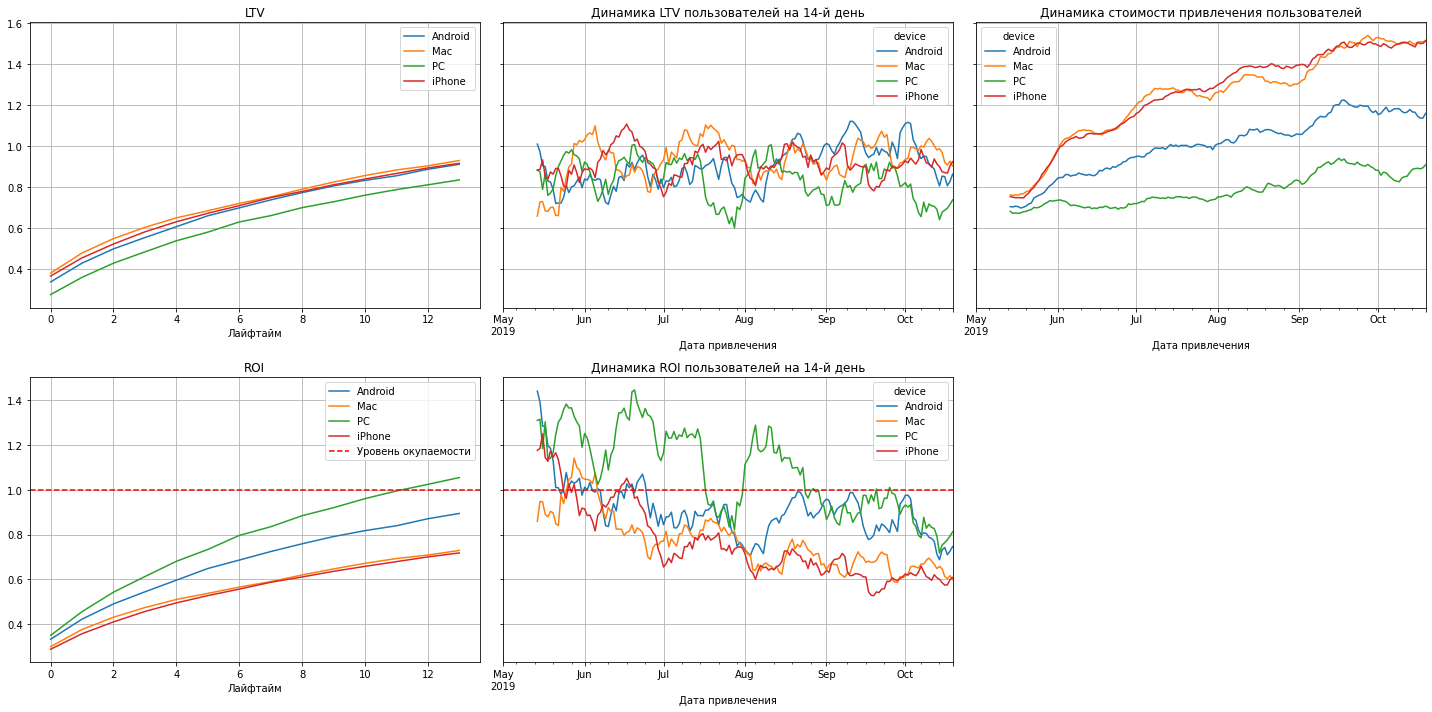

In [84]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 


- Окупаемость пользователей PC выше, чем у пользователей других устройств
- На конец периода все устройства iphone, Mac, РС и Android находятся ниже уроня окупаемости
- Худшая динамика по показателю окупаемости у iphone и Mac
- Стоимость привлечения и динамика пользователей iphone и Mac близки (и выше, в сравнении с Android и PC)

##### **Анализ окупаемости рекламы с разбивкой по странам**
Построение графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI

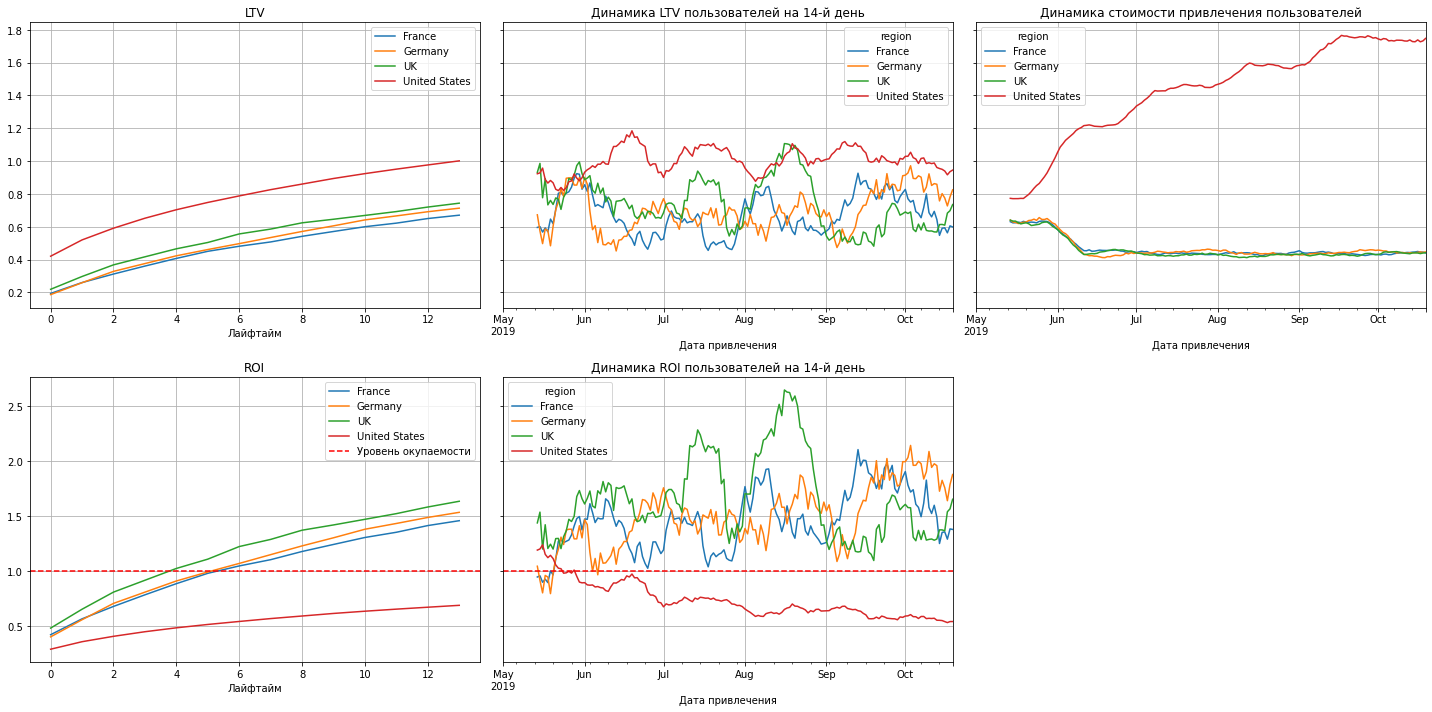

In [86]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

 - Стоимость привлечания пользователей в США растет крайне быстро - возможно, следует снизить стоимость для США   
 - Страна-лидер по LTV ("пожизненной ценности" клиента) - США, однако при этом показатель окупаемости рекламы в США худший  

##### **Анализ окупаемости рекламы с разбивкой по каналам**    
Построение графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

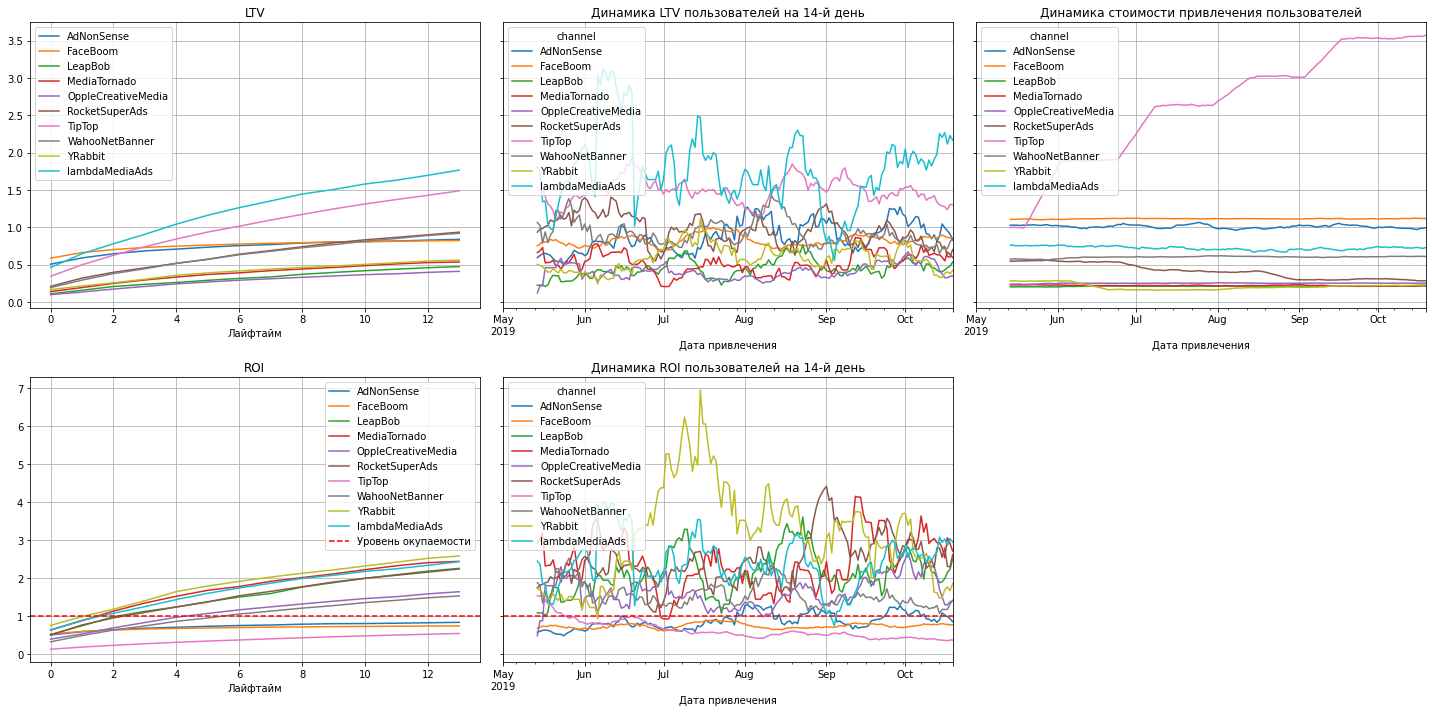

In [87]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- Не окупаются пользователи, привлеченные посредством трех каналов - AdNonSense, FaceBoom и TipTop
- Прирост стоимости привлечения пользователей посредством TipTop слишком сильный
- Показатель "пожизненной ценности" клиентов для различных каналов существенно отличается

**Вопросы:**    
Окупается ли реклама, направленная на привлечение пользователей в целом?    
*Реклама в целом не окупается (см. графики и выводы, описанные выше)*   
     
Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
*Устройства: iphone и Mac*
*Страны: США*  
*Каналы: AdNonSense, FaceBoom и TipTop*
    
Чем могут быть вызваны проблемы окупаемости?    
*Возможно, проблемы окупаемости связаны с неравномерным расходованием средств на рекламу. Как было показано выше, стоимость привлечения одного клиента для разных источников различается. Наибольшая - у канала TipTop, при этом по показателю окупаемости данный канал бьет антирекорды*

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**Формулировка проблемы:** Несмотря на огромные вложения в рекламу, последние несколько месяцев Procrastinate Pro+ терпит убытки.     
**Задача проекта:** разобраться в причинах и помочь компании выйти в плюс.    
Входные данные:
- Минимальная дата привлечения пользователей: 2019-05-01
- Максимальная дата привлечения пользователей: 2019-10-27
- Горизонт анализа - 14 дней
- Момент анализа: ноября 2019 года

В процессе исследования были подробно изучены представленные наборы данных, проведена предобработка и сделаны выводы, основанные на показателях окупаемости, конверсии, удержания пользователей, "пожизненной ценности" клиента и стоимости привлечения пользователей.

Таким образом, были сформулированы следующие тезисы:

- Доля платящих пользователей для США самая высокая (Этот факт не стоит воспринимать буквально: в этой стране и так сконцентрирована большая часть пользователей)

- Большая часть клиентов использует технику Apple. Наибольшая доля платящих пользователей предпочитают Mac

- Общая сумма расходов на маркетинг составила 105 497 у.е.

- TipTop и FaceBoom - единственные каналы привлечения, у которых с течением времени можно наблюдать рост затрат.

- Стоимость привлечения одного клиента для разных источников различается. Наибольшая - у канала TipTop, наименьшая - у LeapBob. 

- Реклама в целом не окупается

- Негативное влияние на окупаемость оказывает ряд параметров, среди которых страна США, устройства бренда Apple и каналы AdNonSense, FaceBoom и TipTop



**Рекомендации:**
- Возможно, при продумывании дальнейшей стратегии стоит обратить внимание на каналы, у которых стоимость привлечения небольшая (Например, YRabbit, MediaTornado и LeapBob). 
- Также следует сократить рекламные изрержки, направляемые в сторону TipTop - они не являются вполне обоснованными (слишком быстро растет стоимость привлечения пользователей)
- Так как устройства iphone и Mac по результатам проведенного исследования оказывают больше негативное влияние на окупаемость, можно сместить фокус в сторону пользователей РС и Android
- Возможно, необходимо лучше продумать рекламные стратегии для Германии, Великобритании и Франции (привлечь аутиторию не только из США)

